In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw7.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 7: Word embeddings and topic modeling 
**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html).**

## Imports

In [2]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
## Submission instructions
<hr>
rubric={points}

**Please be aware that this homework assignment requires installation of several packages in your course environment. It's possible that you'll encounter installation challenges, which might be frustrating. However, remember that solving these issues is not wasting time but it is an essential skill for anyone aspiring to work in data science or machine learning.**

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/main/docs/homework_instructions.md). 

**You may work in a group on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb. If the pdf or html also fail to render on Gradescope, please create two files for your homework: hw6a.ipynb with Exercise 1 and hw6b.ipynb with Exercises 2 and 3 and submit these two files in your submission.  
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 1:  Exploring pre-trained word embeddings <a name="1"></a>
<hr>

In lecture 18, we talked about natural language processing (NLP). Using pre-trained word embeddings is very common in NLP. It has been shown that pre-trained word embeddings work well on a variety of text classification tasks. These embeddings are created by training a model like Word2Vec on a huge corpus of text such as a dump of Wikipedia or a dump of the web crawl. 

A number of pre-trained word embeddings are available out there. Some popular ones are: 

- [GloVe](https://nlp.stanford.edu/projects/glove/)
    * trained using [the GloVe algorithm](https://nlp.stanford.edu/pubs/glove.pdf) 
    * published by Stanford University 
- [fastText pre-trained embeddings for 294 languages](https://fasttext.cc/docs/en/pretrained-vectors.html) 
    * trained using the fastText algorithm
    * published by Facebook
    
In this exercise, you will be exploring GloVe Wikipedia pre-trained embeddings. The code below loads the word vectors trained on Wikipedia using an algorithm called Glove. You'll need `gensim` package in your cpsc330 conda environment to run the code below. 

```
> conda activate cpsc330
> conda install -c anaconda gensim
```

In [3]:
import gensim
import gensim.downloader

print(list(gensim.downloader.info()["models"].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [4]:
# This will take a while to run when you run it for the first time.
import gensim.downloader as api

glove_wiki_vectors = api.load("glove-wiki-gigaword-100")

In [5]:
len(glove_wiki_vectors)

400000

There are 400,000 word vectors in this pre-trained model. 

Now that we have GloVe Wiki vectors loaded in `glove_wiki_vectors`, let's explore the embeddings. 

<br><br>

<!-- BEGIN QUESTION -->

### 1.1 Word similarity using pre-trained embeddings
rubric={points}

**Your tasks:**

- Come up with a list of 4 words of your choice and find similar words to these words using `glove_wiki_vectors` embeddings.

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 2

In [6]:
words=["hello", "queen", "friends", "dog"]

In [7]:
for word in words:
    print(glove_wiki_vectors.most_similar(positive=[word]))

[('goodbye', 0.7905023694038391), ('hey', 0.7171453237533569), ('!', 0.6594691276550293), ('yeah', 0.6267022490501404), ('dear', 0.6220600605010986), ('mister', 0.6092501282691956), ('wow', 0.6079446077346802), ('muddah', 0.6048929691314697), ('mama', 0.6034210324287415), ('thank', 0.599325954914093)]
[('princess', 0.7947244644165039), ('king', 0.7507691383361816), ('elizabeth', 0.7355712056159973), ('royal', 0.7065026760101318), ('lady', 0.7044797539710999), ('victoria', 0.6853758096694946), ('monarch', 0.6683257818222046), ('crown', 0.6680562496185303), ('prince', 0.6640505790710449), ('consort', 0.6570538282394409)]
[('friend', 0.7998455762863159), ('parents', 0.7908138632774353), ('loved', 0.7497485876083374), ('couple', 0.7385954856872559), ('relatives', 0.7226764559745789), ('family', 0.7197333574295044), ('others', 0.7118730545043945), ('whom', 0.7104083299636841), ('strangers', 0.7052596807479858), ('kids', 0.7049313187599182)]
[('cat', 0.8798074126243591), ('dogs', 0.834430932

In [8]:
...

Ellipsis

In [9]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.2 Word similarity using pre-trained embeddings
rubric={points}

**Your tasks:**

1. Calculate cosine similarity for the following word pairs (`word_pairs`) using the [`similarity`](https://radimrehurek.com/gensim/models/keyedvectors.html?highlight=similarity#gensim.models.keyedvectors.KeyedVectors.similarity) method of `glove_wiki_vectors`.

In [10]:
word_pairs = [
    ("coast", "shore"),
    ("clothes", "closet"),
    ("old", "new"),
    ("smart", "intelligent"),
    ("dog", "cat"),
    ("tree", "lawyer"),
]

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 2

In [11]:
for words in word_pairs:
    word1 = words[0]
    word2 = words[1]
    cosine_similarity= glove_wiki_vectors.similarity(word1, word2)
    print(f"Cosine Similarity: {cosine_similarity:.4f}", "for", word1, word2)

Cosine Similarity: 0.7000 for coast shore
Cosine Similarity: 0.5463 for clothes closet
Cosine Similarity: 0.6432 for old new
Cosine Similarity: 0.7553 for smart intelligent
Cosine Similarity: 0.8798 for dog cat
Cosine Similarity: 0.0767 for tree lawyer


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.3 Representation of all words in English
rubric={points}

**Your tasks:**

1. The vocabulary size of Wikipedia embeddings is quite large. The `test_words` list below contains a few new words (called neologisms) and biomedical domain-specific abbreviations. Write code to check whether `glove_wiki_vectors` have representation for these words or not. 
> If a given word `word` is in the vocabulary, `word in glove_wiki_vectors` will return True. 

In [12]:
test_words = [
    "covididiot",
    "fomo",
    "frenemies",
    "anthropause",
    "photobomb",
    "selfie",
    "pxg",  # Abbreviation for pseudoexfoliative glaucoma
    "pacg",  # Abbreviation for primary angle closure glaucoma
    "cct",  # Abbreviation for central corneal thickness
    "escc",  # Abbreviation for esophageal squamous cell carcinoma
]

<div class="alert alert-warning">

Solution_1_3
    
</div>

_Points:_ 2

In [13]:
for word in test_words:
    if (word in glove_wiki_vectors):
        print(True, word, "has representation")
    else:
        print(False, word, "doesn't have representation")

False covididiot doesn't have representation
False fomo doesn't have representation
True frenemies has representation
False anthropause doesn't have representation
False photobomb doesn't have representation
False selfie doesn't have representation
False pxg doesn't have representation
False pacg doesn't have representation
True cct has representation
True escc has representation


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 Stereotypes and biases in embeddings
rubric={points}

Word vectors contain lots of useful information. But they also contain stereotypes and biases of the texts they were trained on. In the lecture, we saw an example of gender bias in Google News word embeddings. Here we are using pre-trained embeddings trained on Wikipedia data. 

**Your tasks:**

1. Explore whether there are any worrisome biases or stereotypes present in these embeddings by trying out at least 4 examples. You can use the following two methods or other methods of your choice to explore this. 
    - the `analogy` function below which gives word analogies (an example shown below)
    - [similarity](https://radimrehurek.com/gensim/models/keyedvectors.html?highlight=similarity#gensim.models.keyedvectors.KeyedVectors.similarity) or [distance](https://radimrehurek.com/gensim/models/keyedvectors.html?highlight=distance#gensim.models.keyedvectors.KeyedVectors.distances) methods (an example is shown below)

> Note that most of the recent embeddings are de-biased. But you might still observe some biases in them. Also, not all stereotypes present in pre-trained embeddings are necessarily bad. But you should be aware of them when you use them in your models. 

In [14]:
def analogy(word1, word2, word3, model=glove_wiki_vectors):
    """
    Returns analogy word using the given model.

    Parameters
    --------------
    word1 : (str)
        word1 in the analogy relation
    word2 : (str)
        word2 in the analogy relation
    word3 : (str)
        word3 in the analogy relation
    model :
        word embedding model

    Returns
    ---------------
        pd.dataframe
    """
    print("%s : %s :: %s : ?" % (word1, word2, word3))
    sim_words = model.most_similar(positive=[word3, word2], negative=[word1])
    return pd.DataFrame(sim_words, columns=["Analogy word", "Score"])

Examples of using analogy to explore biases and stereotypes.  

In [15]:
analogy("man", "doctor", "woman")

man : doctor :: woman : ?


,Analogy word,Score
0,nurse,0.773523
1,physician,0.718943
2,doctors,0.682433
3,patient,0.675068
4,dentist,0.672603
5,pregnant,0.664246
6,medical,0.652045
7,nursing,0.645348
8,mother,0.639333
9,hospital,0.638750


In [16]:
glove_wiki_vectors.similarity("aboriginal", "success")

0.14283244

In [17]:
glove_wiki_vectors.similarity("white", "success")

0.3518238

<div class="alert alert-warning">

Solution_1_4
    
</div>

_Points:_ 4

In [18]:
bias_check= [
    ("boy", "scientist", "girl"),
    ("caucasian", "friendly", "black"),
    ("male", "fast", "female"),
    ("european", "attractive", "african"),
]

for words in bias_check:
    word1 = words[0]
    word2 = words[1]
    word3 = words[2]
    print(analogy(word1, word2, word3))

boy : scientist :: girl : ?
     Analogy word     Score
0      researcher  0.782852
1  anthropologist  0.711237
2       physicist  0.709304
3     sociologist  0.682123
4       professor  0.676703
5          expert  0.661725
6       biologist  0.653127
7          author  0.647878
8    psychologist  0.643443
9         science  0.639652
caucasian : friendly :: black : ?
  Analogy word     Score
0         good  0.670537
1         well  0.653338
2      looking  0.651197
3       turned  0.649914
4        green  0.639224
5       better  0.637954
6          big  0.636915
7          put  0.633890
8         with  0.633368
9         look  0.631745
male : fast :: female : ?
  Analogy word     Score
0         slow  0.754540
1         pace  0.720959
2       faster  0.700028
3        speed  0.679811
4        quick  0.679668
5       moving  0.651116
6         hard  0.647748
7          way  0.646950
8       coming  0.642139
9         easy  0.636975
european : attractive :: african : ?
    Analogy word 

In [19]:
similarity= [
    ("men", "parent"),
    ("woman","parent"),
    ("bisexual", "love"),
    ("lesbian", "love"),
    ("gay", "love"),
]

for words in similarity:
    word1 = words[0]
    word2= words[1]
    print(glove_wiki_vectors.similarity(word1, word2))

0.3136706
0.42824984
0.30585864
0.43516138
0.45533252


In [20]:
...

Ellipsis

In [21]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Discussion
rubric={points}

**Your tasks:**
1. Discuss your observations from 1.4. Are there any worrisome biases in these embeddings trained on Wikipedia?   
2. Give an example of how using embeddings with biases could cause harm in the real world.

<div class="alert alert-warning">

Solution_1_5
    
</div>

_Points:_ 4

1. While the most obvious biases were removed, I could still identify a few. For example, where boys are considered "fast", the analogy for girls had "slow" as the number one answer, playing on the idea that girls aren't as good at sports. Additionally, when looking at the similarity scores, "woman" had a 0.11 higher similarity score than "men". This perpetuates the idea that women are the primary caregivers of children, despite more and more women going into the workforce and taking a shared caregiving role.

2. Biased embeddings can be harmful in the real world. Many jurisdictions have started using machine learning models to determine if someone should be granted bail; these algorithms have been proven to be biased against people of colour since they were trained on historical data and, historically society has been biased against people of colour. If these algorithms get it wrong there are serious consequences; someone not being granted bail means they will likely lose their job and not be able to take care of their children, and someone being granted bail may end up committing another crime.


<!-- END QUESTION -->

<br><br><br><br>

## Exercise 2: Topic modeling 

The goal of topic modeling is discovering high-level themes in a large collection of texts. 

In this homework, you will explore topics in [the 20 newsgroups text dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html) using `scikit-learn`'s `LatentDirichletAllocation` (LDA) model. 

Usually, topic modeling is used for discovering abstract "topics" that occur in a collection of documents when you do not know the actual topics present in the documents. But 20 newsgroups text dataset is labeled with categories (e.g., sports, hardware, religion), and you will be able to cross-check the topics discovered by your model with these available topics. 

The starter code below loads the train and test portion of the data and convert the train portion into a pandas DataFrame. For speed, we will only consider documents with the following 8 categories. 

In [22]:
from sklearn.datasets import fetch_20newsgroups

In [23]:
cats = [
    "rec.sport.hockey",
    "rec.sport.baseball",
    "soc.religion.christian",
    "alt.atheism",
    "comp.graphics",
    "comp.windows.x",
    "talk.politics.mideast",
    "talk.politics.guns",
]  # We'll only consider these categories out of 20 categories for speed.

newsgroups_train = fetch_20newsgroups(
    subset="train", remove=("headers", "footers", "quotes"), categories=cats
)
X_news_train, y_news_train = newsgroups_train.data, newsgroups_train.target
df = pd.DataFrame(X_news_train, columns=["text"])
df["target"] = y_news_train
df["target_name"] = [
    newsgroups_train.target_names[target] for target in newsgroups_train.target
]
df

,text,target,target_name
0,"You know, I was reading 18 U.S.C. 922 and some...",6,talk.politics.guns
1,\n\n\nIt's not a bad question: I don't have an...,1,comp.graphics
2,"\nActuallay I don't, but on the other hand I d...",1,comp.graphics
3,"The following problem is really bugging me,\na...",2,comp.windows.x
4,\n\n This is the latest from UPI \n\n For...,7,talk.politics.mideast
...,...,...,...
4558,Hi Everyone ::\n\nI am looking for some soft...,1,comp.graphics
4559,Archive-name: x-faq/part3\nLast-modified: 1993...,2,comp.windows.x
4560,"\nThat's nice, but it doesn't answer the quest...",6,talk.politics.guns
4561,"Hi,\n I just got myself a Gateway 4DX-33V ...",2,comp.windows.x


In [24]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.windows.x',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast']

<br><br>

<!-- BEGIN QUESTION -->

### 2.1 Preprocessing using [spaCy](https://spacy.io/)
rubric={points}

Preprocessing is a crucial step before carrying out topic modeling and it markedly affects topic modeling results. In this exercise, you'll prepare the data using [spaCy](https://spacy.io/) for topic modeling. 

**Your tasks:** 

- Write code using [spaCy](https://spacy.io/) to preprocess the `text` column in the given dataframe `df` and save the processed text in a new column called `text_pp` within the same dataframe.

If you do not have spaCy in your course environment, you'll have to [install it](https://spacy.io/usage) and download the pretrained model en_core_web_md. 

`python -m spacy download en_core_web_md`


Note that there is no such thing as "perfect" preprocessing. You'll have to make your own judgments and decisions on which tokens are likely to be more informative for the given task. Some common text preprocessing steps for topic modeling include: 
- getting rid of slashes, new-line characters, or any other non-informative characters
- sentence segmentation and tokenization      
- replacing urls, email addresses, or numbers with generic tokens such as "URL",  "EMAIL", "NUM". 
- getting rid of other fairly unique tokens which are not going to help us in topic modeling  
- excluding stopwords and punctuation 
- lemmatization


> Check out [these available attributes](https://spacy.io/api/token#attributes) for `token` in spaCy which might help you with preprocessing. 

> You can also get rid of words with specific POS tags. [Here](https://universaldependencies.org/u/pos/) is the list of part-of-speech tags used in spaCy. 

> You may have to use regex to clean text before passing it to spaCy. Also, you might have to go back and forth between preprocessing in this exercise and and topic modeling in Exercise 2 before finalizing preprocessing steps. 

> Note that preprocessing the corpus might take some time. So here are a couple of suggestions: 1) During the debugging phase, work on a smaller subset of the data. 2) Once you finalize the preprocessing part, you might want to save the preprocessed data in a CSV and work with this CSV so that you don't run the preprocessing part every time you run the notebook. 
 


In [25]:
import spacy
nlp = spacy.load("en_core_web_md", disable=["parser", "ner"])

In [26]:
nlp = spacy.load("en_core_web_md", disable=["parser", "ner"])

<div class="alert alert-warning">

Solution_2_1
    
</div>

_Points:_ 8

In [27]:
sample_df=df[0:100]
sample_df

,text,target,target_name
0,"You know, I was reading 18 U.S.C. 922 and some...",6,talk.politics.guns
1,\n\n\nIt's not a bad question: I don't have an...,1,comp.graphics
2,"\nActuallay I don't, but on the other hand I d...",1,comp.graphics
3,"The following problem is really bugging me,\na...",2,comp.windows.x
4,\n\n This is the latest from UPI \n\n For...,7,talk.politics.mideast
...,...,...,...
95,\n: Logic alert - argument from incredulity. ...,0,alt.atheism
96,"\nGolly, I love stupid people. :-)\nListen, Re...",4,rec.sport.hockey
97,sandiego and graig nettles\n\n\n,3,rec.sport.baseball
98,"Ah yes, I see a few liberal weenies have come ...",6,talk.politics.guns


In [28]:
from nltk.corpus import stopwords
stop_words = list(set(stopwords.words("english")))

def preprocess( #REF: lecture 17
    doc,
    min_token_len=2,
    irrelevant_pos=["ADV", "PRON", "CCONJ", "PUNCT", "PART", "DET", "ADP", "SPACE", "SYM", "VERB"],
):
    clean_text = []

    for token in doc:
        if (
            token.is_stop == False  
            and len(token) > min_token_len  
            and token.pos_ not in irrelevant_pos
            and token.is_alpha == True
            and token.like_email == False
            and token.like_url == False
            and token.is_oov == False
        ):  
            lemma = token.lemma_ 
            clean_text.append(lemma.lower())
    return " ".join(clean_text)

sample_df["text_pp"] = [preprocess(text) for text in nlp.pipe(sample_df["text"])]

/var/folders/01/_660gnl51jz4fmz3h51n8htw0000gn/T/ipykernel_73766/1715734670.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df["text_pp"] = [preprocess(text) for text in nlp.pipe(sample_df["text"])]


In [29]:
sample_df

,text,target,target_name,text_pp
0,"You know, I was reading 18 U.S.C. 922 and some...",6,talk.politics.guns,sence paragraph shall unlawful person machineg...
1,\n\n\nIt's not a bad question: I don't have an...,1,comp.graphics,bad question ref algorithm bit hard point plan...
2,"\nActuallay I don't, but on the other hand I d...",1,comp.graphics,hand idea newsgroup aspect graphic programming...
3,"The following problem is really bugging me,\na...",2,comp.windows.x,problem help window child child event event fy...
4,\n\n This is the latest from UPI \n\n For...,7,talk.politics.mideast,late upi foreign ministry spokesman ferhat ata...
...,...,...,...,...
95,\n: Logic alert - argument from incredulity. ...,0,alt.atheism,logic alert argument incredulity hard true lia...
96,"\nGolly, I love stupid people. :-)\nListen, Re...",4,rec.sport.hockey,golly stupid people listen rex hockey nhl prec...
97,sandiego and graig nettles\n\n\n,3,rec.sport.baseball,nettle
98,"Ah yes, I see a few liberal weenies have come ...",6,talk.politics.guns,yes liberal weenie woodwork burning child cove...


In [30]:
df["text_pp"] = [preprocess(text) for text in nlp.pipe(df["text"])]

In [31]:
df.iloc[2:6]

,text,target,target_name,text_pp
2,"\nActuallay I don't, but on the other hand I d...",1,comp.graphics,hand idea newsgroup aspect graphic programming...
3,"The following problem is really bugging me,\na...",2,comp.windows.x,problem help window child child event event fy...
4,\n\n This is the latest from UPI \n\n For...,7,talk.politics.mideast,late upi foreign ministry spokesman ferhat ata...
5,"Hi,\n I'd like to subscribe to Leadership Ma...",5,soc.religion.christian,leadership magazine disk paper disk illustrati...


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.2 Justification
rubric={points}

**Your tasks:**

- Outline the preprocessing steps you carried out in the previous exercise (bullet point format is fine), providing a brief justification when necessary. 

> You might want to wait to answer this question till you are done with Exercise 2 and you have finalized the preprocessing steps in 2.1. 

<div class="alert alert-warning">

Solution_2_2
    
</div>

_Points:_ 2

- Remove Stopwords and Filler Words: I removed stop words, adverbs, pronouns etc. because these filler/very common words don't help NLP models
- Remove Punctuation, Non-alphabetic Characters, and Symbols (ie. "\"): Removing unnecessary symbols reduces "noise" in the data, making it more interpretable for processing
- Lemmatization: Converting words to their "base" form allows for models to ignore morphological differences

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.3 Build a topic model using sklearn's LatentDirichletAllocation
rubric={points}

**Your tasks:**

1. Build LDA models on the preprocessed data using using [sklearn's `LatentDirichletAllocation`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) and random state 42. Experiment with a few values for the number of topics (`n_components`). Pick a reasonable number for the number of topics and briefly justify your choice.

<div class="alert alert-warning">

Solution_2_3
    
</div>

_Points:_ 4

I have chosen to use 4 topic groups based on the newsgroups; religion (atheism, christian), computers (graphics, windows), politics (guns, mideast), and sports (baseball, hockey).

In [32]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words="english") # REF: lecture 17
df_transformed = vec.fit_transform(df["text_pp"])

n_topics = 4 # REF: lecture 17
lda = LatentDirichletAllocation(
    n_components=n_topics, learning_method="batch", max_iter=10, random_state=42
)
lda.fit(df_transformed) 
document_topics = lda.transform(df_transformed)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.4 Exploring word topic association
rubric={points}

**Your tasks:**
1. For the number of topics you picked in the previous exercise, show top 10 words for each of your topics and suggest labels for each of the topics (similar to how we came up with labels "health and nutrition", "fashion", and "machine learning" in the toy example we saw in class). 

> If your topics do not make much sense, you might have to go back to preprocessing in Exercise 2.1, improve it, and train your LDA model again. 

<div class="alert alert-warning">

Solution_2_4
    
</div>

_Points:_ 5

In [33]:
import mglearn
sorting = np.argsort(lda.components_, axis=1)[:, ::-1] #REF: lecture 17
feature_names = np.array(vec.get_feature_names_out())


mglearn.tools.print_topics(
    topics=range(4),
    feature_names=feature_names,
    sorting=sorting,
    topics_per_chunk=5,
    n_words=10,
)

topic 0       topic 1       topic 2       topic 3       
--------      --------      --------      --------      
people        file          god           gun           
israel        game          people        people        
armenian      team          jesus         time          
turkish       program       thing         year          
jews          year          time          thing         
right         image         good          weapon        
government    good          church        firearm       
armenians     window        question      day           
israeli       time          way           law           
war           player        bible         child         




topic 0 = sports

topic 1 = computers

topic 2 = religion

topic 3 = politics

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.5 Exploring document topic association
rubric={points}

**Your tasks:**
1. Show the document topic assignment of the first five documents from `df`. 
2. Comment on the document topic assignment of the model. 

<div class="alert alert-warning">

Solution_2_5
    
</div>

_Points:_ 5

In [34]:
for doc in range(0,5):
    print(df.iloc[doc]['target_name'], document_topics[doc])

talk.politics.guns [0.64779194 0.00887067 0.00893122 0.33440618]
comp.graphics [0.00480932 0.71935253 0.00491622 0.27092192]
comp.graphics [0.00750351 0.29042226 0.69448865 0.00758559]
comp.windows.x [0.5240508  0.41973233 0.02812468 0.02809219]
talk.politics.mideast [0.97675747 0.00772963 0.00777546 0.00773745]


The model is able to correctly predict if the text falls under the "poitics" categoey with a very high accuracy; however, it struggles to pick a clear winner when dealing with text that should fall within the computer category.

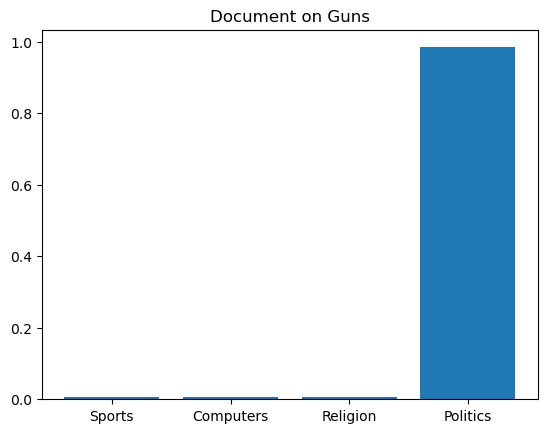

In [39]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["Sports", "Computers", "Religion", "Politics"])
y = np.array([0.00508072, 0.00531842, 0.00545749, 0.98414336])

plt.title("Document on Guns")
plt.bar(x,y)
plt.show()

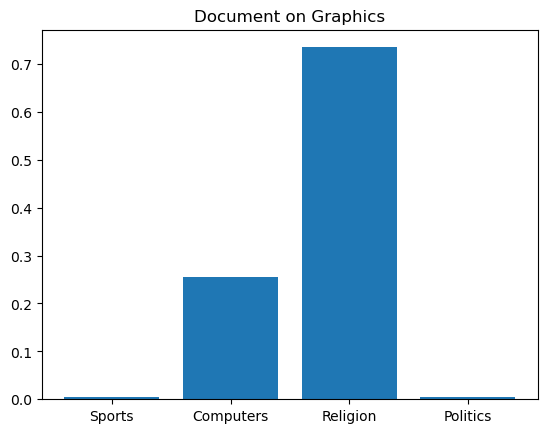

In [48]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["Sports", "Computers", "Religion", "Politics"])
y = np.array([0.00531496, 0.2547986,  0.73457426, 0.00531218])

plt.title("Document on Graphics")
plt.bar(x,y)
plt.show()

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

## Exercise 3: Short answer questions 
<hr>

rubric={points}

1. Briefly explain how content-based filtering works in the context of recommender systems. 
2. Discuss at least two negative consequences of recommender systems.
3. What is transfer learning in natural language processing? Briefly explain.     

<div class="alert alert-warning">

Solution_3
    
</div>

_Points:_ 6

1. Content-based filtering in the context of a recommender systems is a supervised machine learning approach that looks recommends things based on similar things you've enjoyed in the past. For example, Netflix uses a content-based filtering system to recommend you new movies based on movies you've enjoyed in the past.
2. Recommender systems essentially put you into a "box" based on your past preferences and push content that alines based on that; this makes it difficult for you to discover new content. Additionally, this creates an echo chamber of your beliefs being funneled back to you, with no opposing views being shown it is difficult to broaden your perspective and learn new things. Also, these systems will struggle to recommend things to people who don't frequently use their platform since there isn't enough data on them.
3. Transfer learning is the practice of taking a pretrained model and adjusting it to your preferences. This reduces the lengthy process of creating a model from scratch.

<!-- END QUESTION -->

<br><br><br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.** 

![](img/eva-well-done.png)